**Data Preprocessing Techniques**

* Missing Values
* Outliers
* Duplicates Value
* Type casting
* Structural Errror
* Transformation
* Descretization
* Encoding, Dummy Variable Creation
* Scaling
* Zero Variance Feature

In [1]:
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
from sklearn.impute import KNNImputer
from feature_engine.outliers import Winsorizer 

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\loandata (1).csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120.0,360.0,1.0,Semiurban,Y
610,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
611,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
612,LP002101,Male,Yes,0,Graduate,NaN,63337,0.0,490.0,180.0,1.0,Urban,Y
613,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural,N


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
numeric_var = df.select_dtypes(include = ('int64' , 'float64'))
catog_var = df.select_dtypes(include = 'object')

In [8]:
numeric_var

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,150,1800.0,135.0,360.0,1.0
1,210,2917.0,98.0,360.0,1.0
2,416,41667.0,350.0,180.0,NaN
3,645,3683.0,113.0,480.0,1.0
4,674,5296.0,168.0,360.0,1.0
...,...,...,...,...,...
609,39147,4750.0,120.0,360.0,1.0
610,39999,0.0,600.0,180.0,0.0
611,51763,0.0,700.0,300.0,1.0
612,63337,0.0,490.0,180.0,1.0


In [9]:
catog_var

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,Rural,N
1,LP002502,Female,Yes,2,Not Graduate,NaN,Semiurban,Y
2,LP002949,Female,No,3+,Graduate,NaN,Urban,N
3,LP002603,Female,No,0,Graduate,No,Rural,Y
4,LP001644,NaN,Yes,0,Graduate,Yes,Rural,Y
...,...,...,...,...,...,...,...,...
609,LP001640,Male,Yes,0,Graduate,Yes,Semiurban,Y
610,LP001536,Male,Yes,3+,Graduate,No,Semiurban,Y
611,LP001585,NaN,Yes,3+,Graduate,No,Urban,Y
612,LP002101,Male,Yes,0,Graduate,NaN,Urban,Y


**Missing Value Identification**

In [10]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Missing Value Treatment**

In [11]:
from sklearn.impute import KNNImputer , SimpleImputer
# I am filling Numerical missing using knn imputer after selection of k values as 5, 
# it will fill value with mean of nearest 5 values.

# I am filling Catorical missing values using Simple imputer based on mode(most frequent values)

In [12]:
knn = KNNImputer(missing_values=np.nan , n_neighbors=5)
knn.fit([df['LoanAmount'] , df['Loan_Amount_Term'] , df['Credit_History']])
[df['LoanAmount'] , df['Loan_Amount_Term'] , df['Credit_History']] = knn.transform([df['LoanAmount'] , df['Loan_Amount_Term'] , df['Credit_History']])

In [13]:
simp = SimpleImputer(missing_values=np.nan , strategy='most_frequent')
simp.fit([df['Gender'] , df['Married'] , df['Dependents'] , df['Self_Employed']])
[df['Gender'] , df['Married'] , df['Dependents'] , df['Self_Employed']] = simp.transform([df['Gender'] , df['Married'] , df['Dependents'] , df['Self_Employed']])

In [14]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Outliers Identification**

ApplicantIncome      Axes(0.125,0.747241;0.775x0.132759)
CoapplicantIncome    Axes(0.125,0.587931;0.775x0.132759)
LoanAmount           Axes(0.125,0.428621;0.775x0.132759)
Loan_Amount_Term      Axes(0.125,0.26931;0.775x0.132759)
Credit_History           Axes(0.125,0.11;0.775x0.132759)
dtype: object

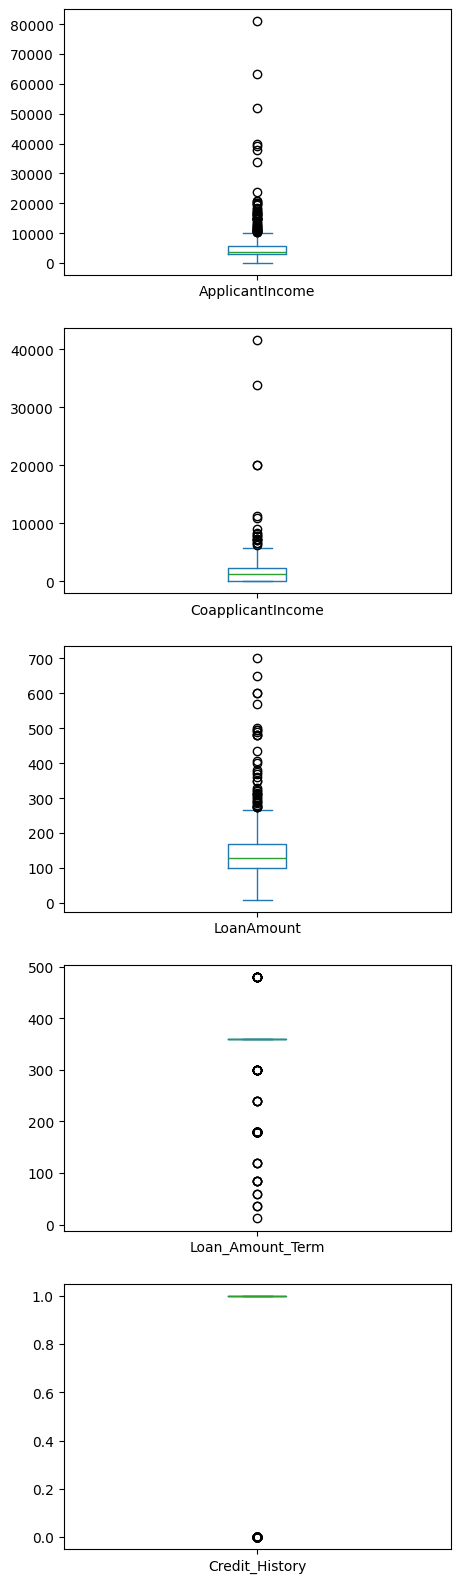

In [15]:
numeric_var.plot(kind='box' , subplots = True , layout = (5,1) , figsize = (5,20))

**Outliers Treatment**

In [16]:
from feature_engine.outliers import Winsorizer

In [17]:
wins = Winsorizer(capping_method='quantiles' , tail='both' , fold=3)

In [18]:
for i in df.select_dtypes(include=['int','float']):
    df[i] = wins.fit_transform(df[[i]])

In [19]:
numeric_var = df.select_dtypes(include = ('int64' , 'float64'))
catog_var = df.select_dtypes(include = 'object')

ApplicantIncome      Axes(0.125,0.747241;0.775x0.132759)
CoapplicantIncome    Axes(0.125,0.587931;0.775x0.132759)
LoanAmount           Axes(0.125,0.428621;0.775x0.132759)
Loan_Amount_Term      Axes(0.125,0.26931;0.775x0.132759)
Credit_History           Axes(0.125,0.11;0.775x0.132759)
dtype: object

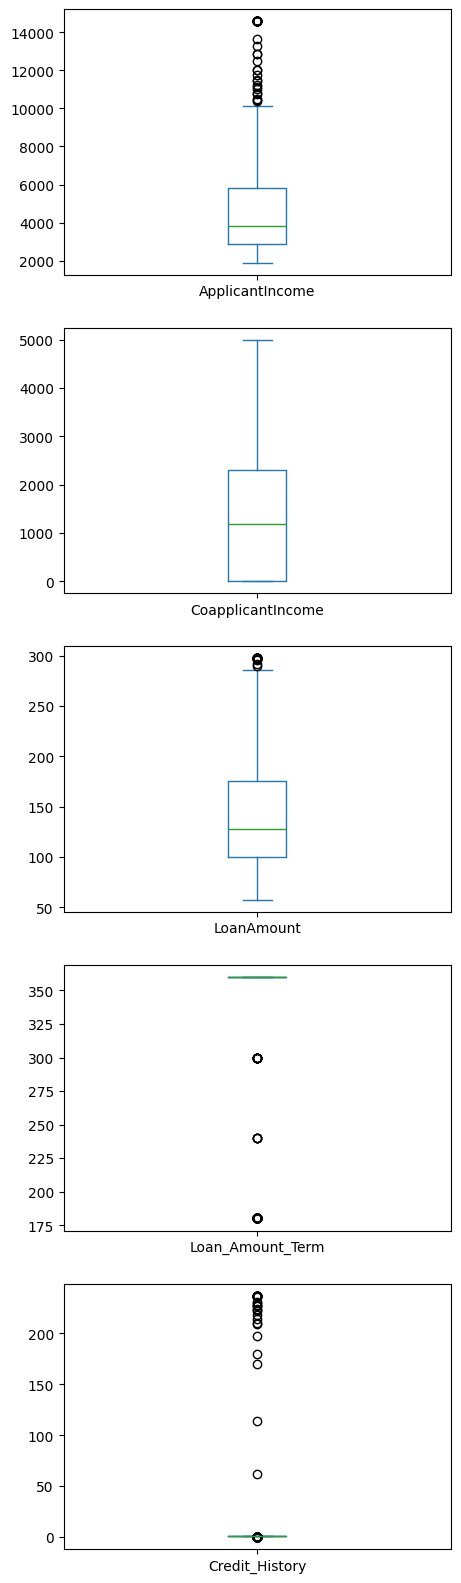

In [20]:
numeric_var.plot(kind='box' , subplots = True , layout = (5,1) , figsize = (5,20))

**Duplicates Identification**

In [21]:
df.duplicated().sum()

0

**Structural Error Identification**

In [22]:
for i in df.columns:
    print(i , df[i].unique())

Loan_ID ['LP001722' 'LP002502' 'LP002949' 'LP002603' 'LP001644' 'LP001259'
 'LP002345' 'LP002717' 'LP001030' 'LP001267' 'LP001086' 'LP002287'
 'LP001518' 'LP002342' 'LP001977' 'LP001835' 'LP001343' 'LP002877'
 'LP001120' 'LP001964' 'LP001825' 'LP001917' 'LP001581' 'LP002361'
 'LP001109' 'LP002113' 'LP002893' 'LP001029' 'LP001560' 'LP001245'
 'LP002898' 'LP001669' 'LP001634' 'LP002398' 'LP001155' 'LP002447'
 'LP002544' 'LP002300' 'LP001333' 'LP002265' 'LP001990' 'LP001473'
 'LP001963' 'LP002670' 'LP001608' 'LP002036' 'LP001868' 'LP001384'
 'LP002478' 'LP002537' 'LP002648' 'LP001195' 'LP001431' 'LP002743'
 'LP002335' 'LP002917' 'LP002308' 'LP001641' 'LP002689' 'LP002314'
 'LP002401' 'LP001405' 'LP001736' 'LP001579' 'LP002755' 'LP002332'
 'LP001106' 'LP001532' 'LP002916' 'LP001915' 'LP002446' 'LP001514'
 'LP001013' 'LP001630' 'LP002244' 'LP002239' 'LP001279' 'LP002116'
 'LP002840' 'LP001643' 'LP001947' 'LP001266' 'LP001123' 'LP001994'
 'LP002051' 'LP002960' 'LP002143' 'LP002387' 'LP002556

**Structural Error Treatment**

In [23]:
df['Gender'] = df['Gender'].replace("Yes" , df['Gender'].mode()[0])
df['Gender'] = df['Gender'].replace("No" , df['Gender'].mode()[0])
df['Gender'] = df['Gender'].replace("0" , df['Gender'].mode()[0])
df['Gender'] = df['Gender'].replace("2" , df['Gender'].mode()[0])
df['Gender'] = df['Gender'].replace("3+" , df['Gender'].mode()[0])


In [24]:
df['Married'] = df['Married'].replace("Male" , df['Married'].mode()[0])
df['Married'] = df['Married'].replace("Female" , df['Married'].mode()[0])

In [25]:
df['Dependents'] = df['Dependents'].replace("Yes" , df['Dependents'].mode()[0])
df['Dependents'] = df['Dependents'].replace("No" , df['Dependents'].mode()[0])
df['Dependents'] = df['Dependents'].replace("Male" , df['Dependents'].mode()[0])
df['Dependents'] = df['Dependents'].replace("Female" , df['Dependents'].mode()[0])
df['Dependents'] = df['Dependents'].replace("3+" , "3")

In [26]:
df['Self_Employed'] = df['Self_Employed'].replace("0" , df['Self_Employed'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].replace("2" , df['Self_Employed'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].replace("3+" , df['Self_Employed'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].replace("1" , df['Self_Employed'].mode()[0])

In [27]:
df['Loan_Status'] = df['Loan_Status'].replace("Y" , "Yes")
df['Loan_Status'] = df['Loan_Status'].replace("N" , "No")

**Zero variance Identification**

In [28]:
#For Numeric features

In [29]:
for i in numeric_var.columns:
    print(i , numeric_var[i].var())

ApplicantIncome 10068910.392009666
CoapplicantIncome 2397686.5287769465
LoanAmount 3641.1690111641906
Loan_Amount_Term 3359.76215653246
Credit_History 3811.999526126383


In [30]:
#For catagoric Features

In [31]:
for i in catog_var.columns:
    print(i , catog_var[i].unique())

Loan_ID ['LP001722' 'LP002502' 'LP002949' 'LP002603' 'LP001644' 'LP001259'
 'LP002345' 'LP002717' 'LP001030' 'LP001267' 'LP001086' 'LP002287'
 'LP001518' 'LP002342' 'LP001977' 'LP001835' 'LP001343' 'LP002877'
 'LP001120' 'LP001964' 'LP001825' 'LP001917' 'LP001581' 'LP002361'
 'LP001109' 'LP002113' 'LP002893' 'LP001029' 'LP001560' 'LP001245'
 'LP002898' 'LP001669' 'LP001634' 'LP002398' 'LP001155' 'LP002447'
 'LP002544' 'LP002300' 'LP001333' 'LP002265' 'LP001990' 'LP001473'
 'LP001963' 'LP002670' 'LP001608' 'LP002036' 'LP001868' 'LP001384'
 'LP002478' 'LP002537' 'LP002648' 'LP001195' 'LP001431' 'LP002743'
 'LP002335' 'LP002917' 'LP002308' 'LP001641' 'LP002689' 'LP002314'
 'LP002401' 'LP001405' 'LP001736' 'LP001579' 'LP002755' 'LP002332'
 'LP001106' 'LP001532' 'LP002916' 'LP001915' 'LP002446' 'LP001514'
 'LP001013' 'LP001630' 'LP002244' 'LP002239' 'LP001279' 'LP002116'
 'LP002840' 'LP001643' 'LP001947' 'LP001266' 'LP001123' 'LP001994'
 'LP002051' 'LP002960' 'LP002143' 'LP002387' 'LP002556

**Transformation (Normally Distribution Identification)**

In [32]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import FunctionTransformer

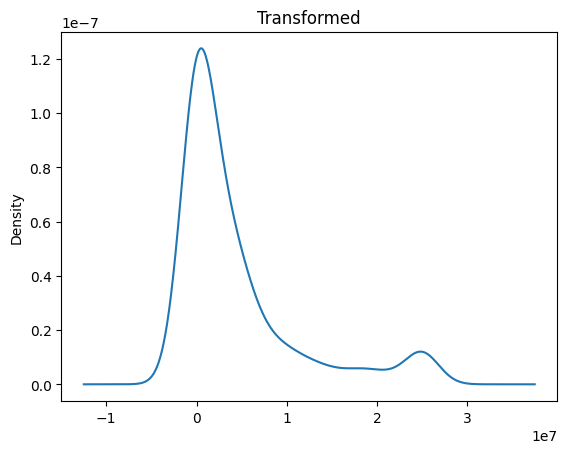

In [33]:
def sqr(n):
    return np.power(n,2)

fun = FunctionTransformer(func=sqr)
df['CoapplicantIncome'] = fun.fit_transform(df['CoapplicantIncome'])


plt.title("Transformed")
df['CoapplicantIncome'].plot(kind='kde')
plt.show()

In [34]:
from sklearn.preprocessing import QuantileTransformer

C:\Users\User\anaconda3\envs\Python\Lib\site-packages\sklearn\preprocessing\_data.py:2663: UserWarning: n_quantiles (1000) is greater than the total number of samples (614). n_quantiles is set to n_samples.
  warnings.warn(


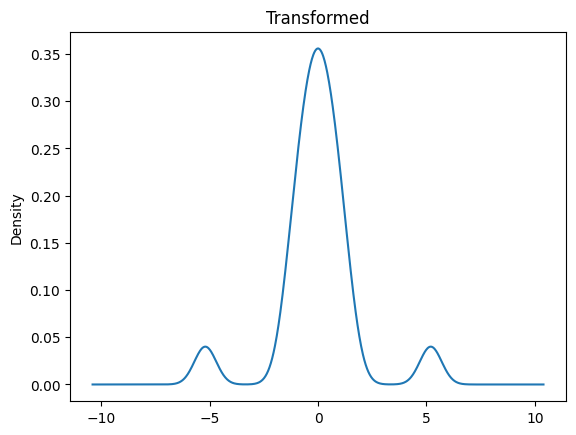

In [35]:
quant = QuantileTransformer(output_distribution='normal')
df['LoanAmount'] = quant.fit_transform(df[['LoanAmount']])


plt.title("Transformed")
df['LoanAmount'].plot(kind='kde')
plt.show()

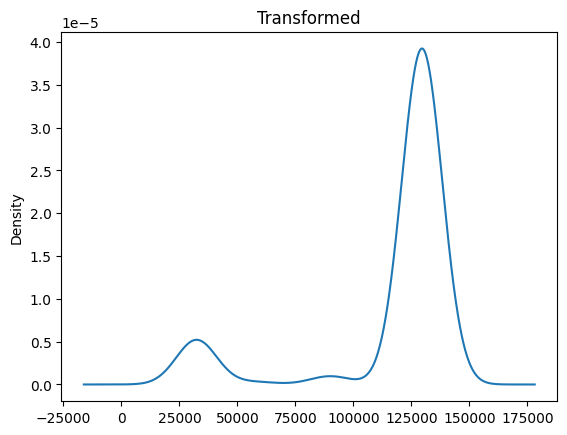

In [36]:
def sqr(n):
    return np.power(n,2)

fun = FunctionTransformer(func=sqr)
df['Loan_Amount_Term']= fun.fit_transform(df['Loan_Amount_Term'])


plt.title("Transformed")
df['Loan_Amount_Term'].plot(kind='kde')
plt.show()


**Scaling**

In [37]:
from sklearn.preprocessing import StandardScaler, RobustScaler , MinMaxScaler , MaxAbsScaler  

In [38]:
stan = StandardScaler()

In [39]:
for i in df.select_dtypes(include = ('int' , 'float')):
    df[i] = stan.fit_transform(df[[i]])

In [40]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001722,Male,Yes,0,Graduate,No,-0.951486,-0.160696,0.085078,0.393626,-0.29197,Rural,No
1,LP002502,Female,Yes,2,Not Graduate,No,-0.951486,0.620870,-0.426556,0.393626,-0.29197,Semiurban,Yes
2,LP002949,Female,No,3,Graduate,No,-0.951486,3.063241,2.866377,-2.694651,3.53111,Urban,No
3,LP002603,Female,No,0,Graduate,No,-0.951486,1.370798,-0.196620,0.393626,-0.29197,Rural,Yes
4,LP001644,Male,Yes,0,Graduate,Yes,-0.951486,3.063241,0.336699,0.393626,-0.29197,Rural,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP001640,Male,Yes,0,Graduate,Yes,3.049514,2.705527,-0.110989,0.393626,-0.29197,Semiurban,Yes
610,LP001536,Male,Yes,3,Graduate,No,3.049514,-0.641305,2.866377,-2.694651,-0.30818,Semiurban,Yes
611,LP001585,Male,Yes,3,Graduate,No,3.049514,-0.641305,2.866377,-0.864561,-0.29197,Urban,Yes
612,LP002101,Male,Yes,0,Graduate,No,3.049514,-0.641305,2.866377,-2.694651,-0.29197,Urban,Yes


**Encoding**

In [41]:
from sklearn.preprocessing import OneHotEncoder , LabelEncoder , OrdinalEncoder

In [42]:
order = ('Rural', 'Semiurban', 'Urban')
ord = OrdinalEncoder(categories=[order])
df[['Property_Area']] = ord.fit_transform(df[['Property_Area']])

In [43]:
catog = ('Self_Employed','Education','Loan_Status','Married','Gender')
for i in catog:
    encoder = OneHotEncoder()
    df[i] = encoder.fit_transform(df[[i]]).todense()


In [44]:
lab = OrdinalEncoder()
df[['Loan_ID']] = lab.fit_transform(df[['Loan_ID']])

In [45]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,216.0,0.0,0.0,0,1.0,1.0,-0.951486,-0.160696,0.085078,0.393626,-0.29197,0.0,1.0
1,468.0,1.0,0.0,2,0.0,1.0,-0.951486,0.620870,-0.426556,0.393626,-0.29197,1.0,0.0
2,600.0,1.0,1.0,3,1.0,1.0,-0.951486,3.063241,2.866377,-2.694651,3.53111,2.0,1.0
3,500.0,1.0,1.0,0,1.0,1.0,-0.951486,1.370798,-0.196620,0.393626,-0.29197,0.0,0.0
4,188.0,0.0,0.0,0,1.0,0.0,-0.951486,3.063241,0.336699,0.393626,-0.29197,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,185.0,0.0,0.0,0,1.0,0.0,3.049514,2.705527,-0.110989,0.393626,-0.29197,1.0,0.0
610,155.0,0.0,0.0,3,1.0,1.0,3.049514,-0.641305,2.866377,-2.694651,-0.30818,1.0,0.0
611,171.0,0.0,0.0,3,1.0,1.0,3.049514,-0.641305,2.866377,-0.864561,-0.29197,2.0,0.0
612,333.0,0.0,0.0,0,1.0,1.0,3.049514,-0.641305,2.866377,-2.694651,-0.29197,2.0,0.0


**Type Casting**

In [46]:
df.dtypes

Loan_ID              float64
Gender               float64
Married              float64
Dependents            object
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [47]:
categ = ('Self_Employed','Education','Loan_Status','Married','Gender' , 'Loan_ID')
for i in categ:
    df[i] = df[i].astype("int")

In [48]:
df.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status            int32
dtype: object

In [49]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,216,0,0,0,1,1,-0.951486,-0.160696,0.085078,0.393626,-0.29197,0.0,1
1,468,1,0,2,0,1,-0.951486,0.620870,-0.426556,0.393626,-0.29197,1.0,0
2,600,1,1,3,1,1,-0.951486,3.063241,2.866377,-2.694651,3.53111,2.0,1
3,500,1,1,0,1,1,-0.951486,1.370798,-0.196620,0.393626,-0.29197,0.0,0
4,188,0,0,0,1,0,-0.951486,3.063241,0.336699,0.393626,-0.29197,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,185,0,0,0,1,0,3.049514,2.705527,-0.110989,0.393626,-0.29197,1.0,0
610,155,0,0,3,1,1,3.049514,-0.641305,2.866377,-2.694651,-0.30818,1.0,0
611,171,0,0,3,1,1,3.049514,-0.641305,2.866377,-0.864561,-0.29197,2.0,0
612,333,0,0,0,1,1,3.049514,-0.641305,2.866377,-2.694651,-0.29197,2.0,0
